# Clustering Assignment

# HELP-NGO

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Objectives

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested :

Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.

Outlier Analysis: You must perform the Outlier Analysis on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.

Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]

Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 

Both K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.) Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.



# Result Expected

A well-commented Jupyter notebook containing the Clustering Models(both K-means and Hierarchical Clustering) and the final list of countries.

Present the overall approach of the analysis in a presentation.

Mention the problem statement and the analysis approach.

Explain the results of  Clustering Model briefly.

Include visualisations and summarise the most important results in the presentation.

Make sure that you mention the final list of countries here ( Don't just mention the cluster id or cluster name here. Mention the names of all the countries.)


You need to submit the following  two components;

Python notebook: Should include detailed comments and should not contain unnecessary pieces of code.

PPT:  Make a PPT to present your analysis to the CEO (and thus you should include both the technical and the business aspects). The PPT should be concise, clear, and to the point. Submit the PPT after converting into the PDF format. The visualisations mentioned above must be present in this file.

# Attribute Information

data-dictionary have the following fields:

Column                     Name	Description

country;	              Name of the country

child_mort;  	Death of children under 5 years of age per 1000 live births.

exports;	    Exports of goods and services per capita. Given as %age of the GDP per capita.

health;	        Total health spending per capita. Given as %age of GDP per capita.

imports;	    Imports of goods and services per capita. Given as %age of the GDP per capita.

Income;     	Net income per person.

Inflation;   	The measurement of the annual growth rate of the Total GDP.

life_expec; 	The average number of years a new born child would live if the current mortality patterns are to remain the                     same.

total_fer;  	The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp;       	The GDP per capita. Calculated as the Total GDP divided by the total population.


# Importing the Libraries

In [1]:
#import the warnings.
import warnings
#Suppress the warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the scaling library - StandardScaler
from sklearn.preprocessing import StandardScaler


# importing clustering libraries
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Importing labraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# 1. Reading and Understanding the dataset

## 1.1 Importing the input files 

In [3]:
# Reading from read only file "Country-data.csv"
DF = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)

# Print the input dataset DF
DF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
# Print the first five lines from the input dataset DF
DF.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# checking the shape of input dataset DF
DF.shape

(167, 10)

In [6]:
#checking the size of input dataset DF
DF.size

1670

In [7]:
# checking the dtype of input dataset DF
DF.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [8]:
# checking info of dataset DF
DF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Inference: As we can see that all columns are numericals except for one column - 'country'.

In [9]:
# checking the null values in dataset DF
DF.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Inference: No missing values in the dataset DF. And columns are in correct data format.

In [10]:
#describe the dataset DF
DF.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
# checking the correleration of dataset DF
DF.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


## 1.2 Data Transformation 

### Changing the column 'health', 'imports' and 'exports' percentage of Total GDP into 'health', 'imports' and 'exports' percentage of total gdpp for making dataset complete sense. 

In [12]:
# Now changing per Total GDP to per Total GDPP
DF['health']=(DF['health']*DF['gdpp'])/100
DF['imports']=(DF['imports']*DF['gdpp'])/100
DF['income']=(DF['income']*DF['gdpp'])/100

# Printing the dataset DF
DF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,155.9250,1565.190,87615.0,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,662.8500,2376.000,2227500.0,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,89.6040,1050.620,58819.0,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,67.8580,450.640,58688.0,23.60,67.5,4.67,1310


In [13]:
# Print the first five lines from the input dataset DF
DF.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


# 2. EDA and Outliers  Dectection andTreatment

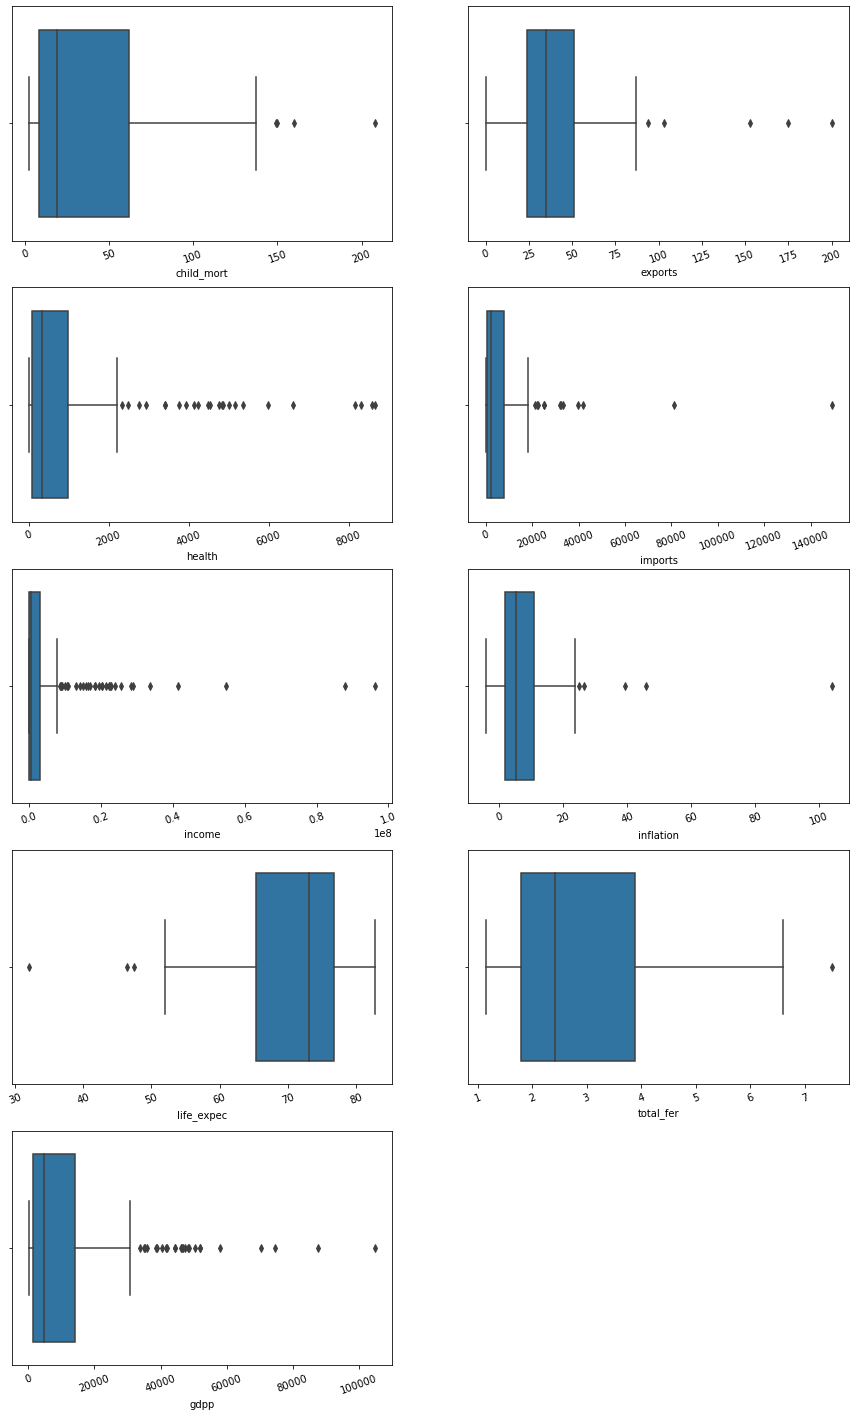

In [14]:
# Visualization Using subplot check the outliers 

# setting figure size
plt.figure(figsize=(15,25))

Features_Col = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(Features_Col): 
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(DF[i[1]])
    plt.xticks(rotation = 20)

Inference : Using subplot we can also see that outliers are present in every columns.

## 2.1 Outlier Treatment

In [15]:
# Outlier Treatment using IQR Method

def outlier_treatment(DF, col):
    
    Q1 = DF[col].quantile(0.25)

    Q3 = DF[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    DF.loc[(DF[col] > higher_cap), col] = higher_cap
    DF.loc[(DF[col] < lower_cap), col] = lower_cap
    
    return DF

In [16]:
DF = outlier_treatment(DF, 'child_mort')
DF = outlier_treatment(DF, 'exports')
DF = outlier_treatment(DF, 'health')
DF = outlier_treatment(DF, 'imports')
DF = outlier_treatment(DF, 'income')
DF = outlier_treatment(DF, 'inflation')
DF = outlier_treatment(DF, 'life_expec')
DF = outlier_treatment(DF, 'total_fer')
DF = outlier_treatment(DF, 'gdpp')

In [17]:
#describe the dataset DF
DF.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000
mean,37.698204,39.543557,680.241240,4756.898995,2.229567e+06,7.065066,70.663772,2.945075,10351.281437
std,38.443293,21.301318,804.768458,5690.687520,3.008337e+06,6.704968,8.522535,1.505564,11612.044330
min,2.600000,0.109000,12.821200,0.651092,1.764840e+03,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,23.800000,78.535500,640.215000,4.888200e+04,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,321.886000,2045.580000,4.999920e+05,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,976.940000,7719.600000,3.117750e+06,10.750000,76.800000,3.880000,14050.000000
max,142.875000,92.675000,2324.546750,18338.677500,7.721052e+06,24.160000,82.800000,7.007500,33130.000000


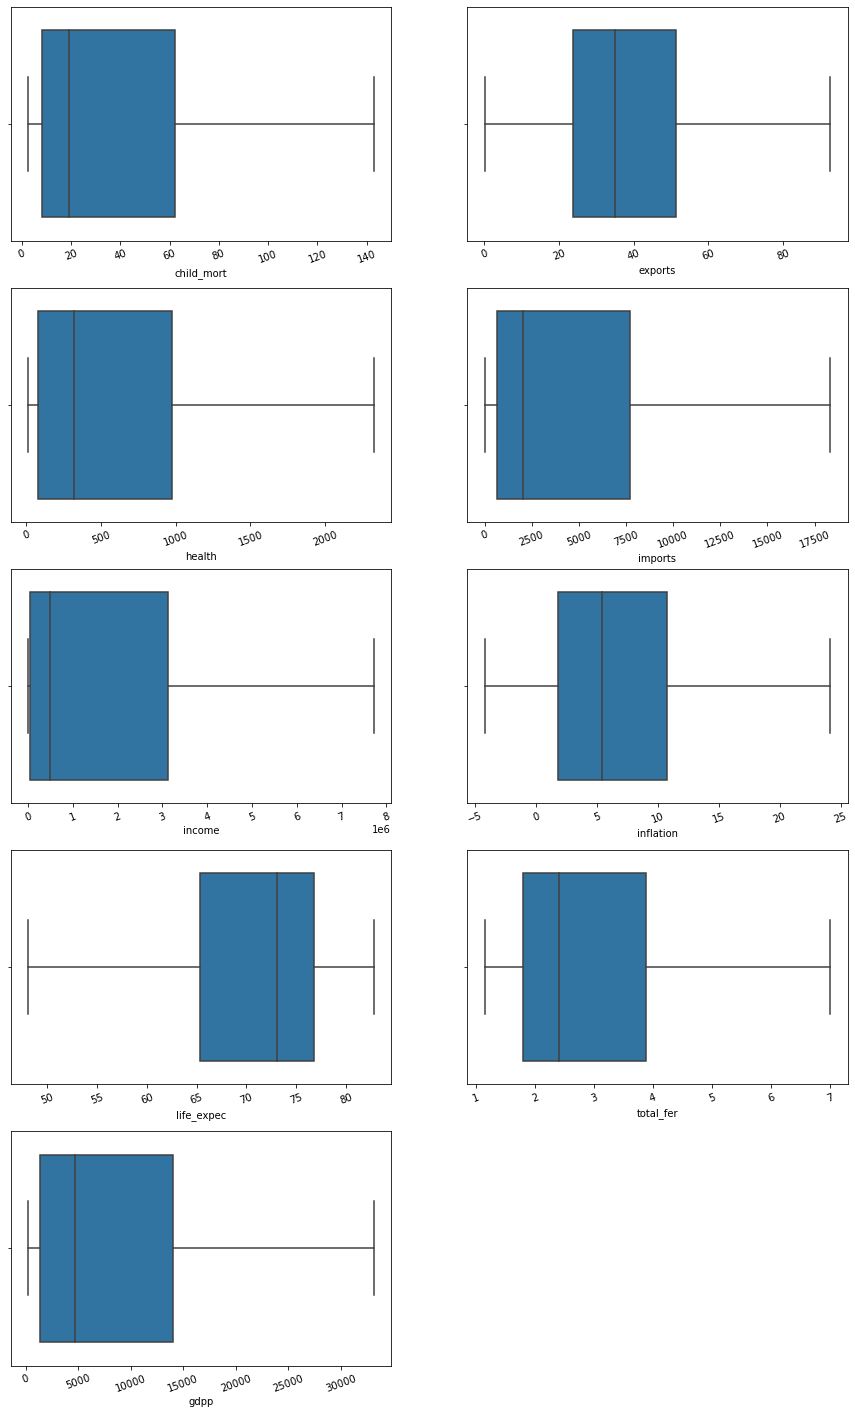

In [18]:
# Visualization Using subplot after outliers treatment

# setting figure size
plt.figure(figsize=(15,25))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features):             # for loop
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(DF[i[1]])
    plt.xticks(rotation = 20)

Inference: We treated ouliers by upper and lower capping them.

<Figure size 1440x1080 with 0 Axes>

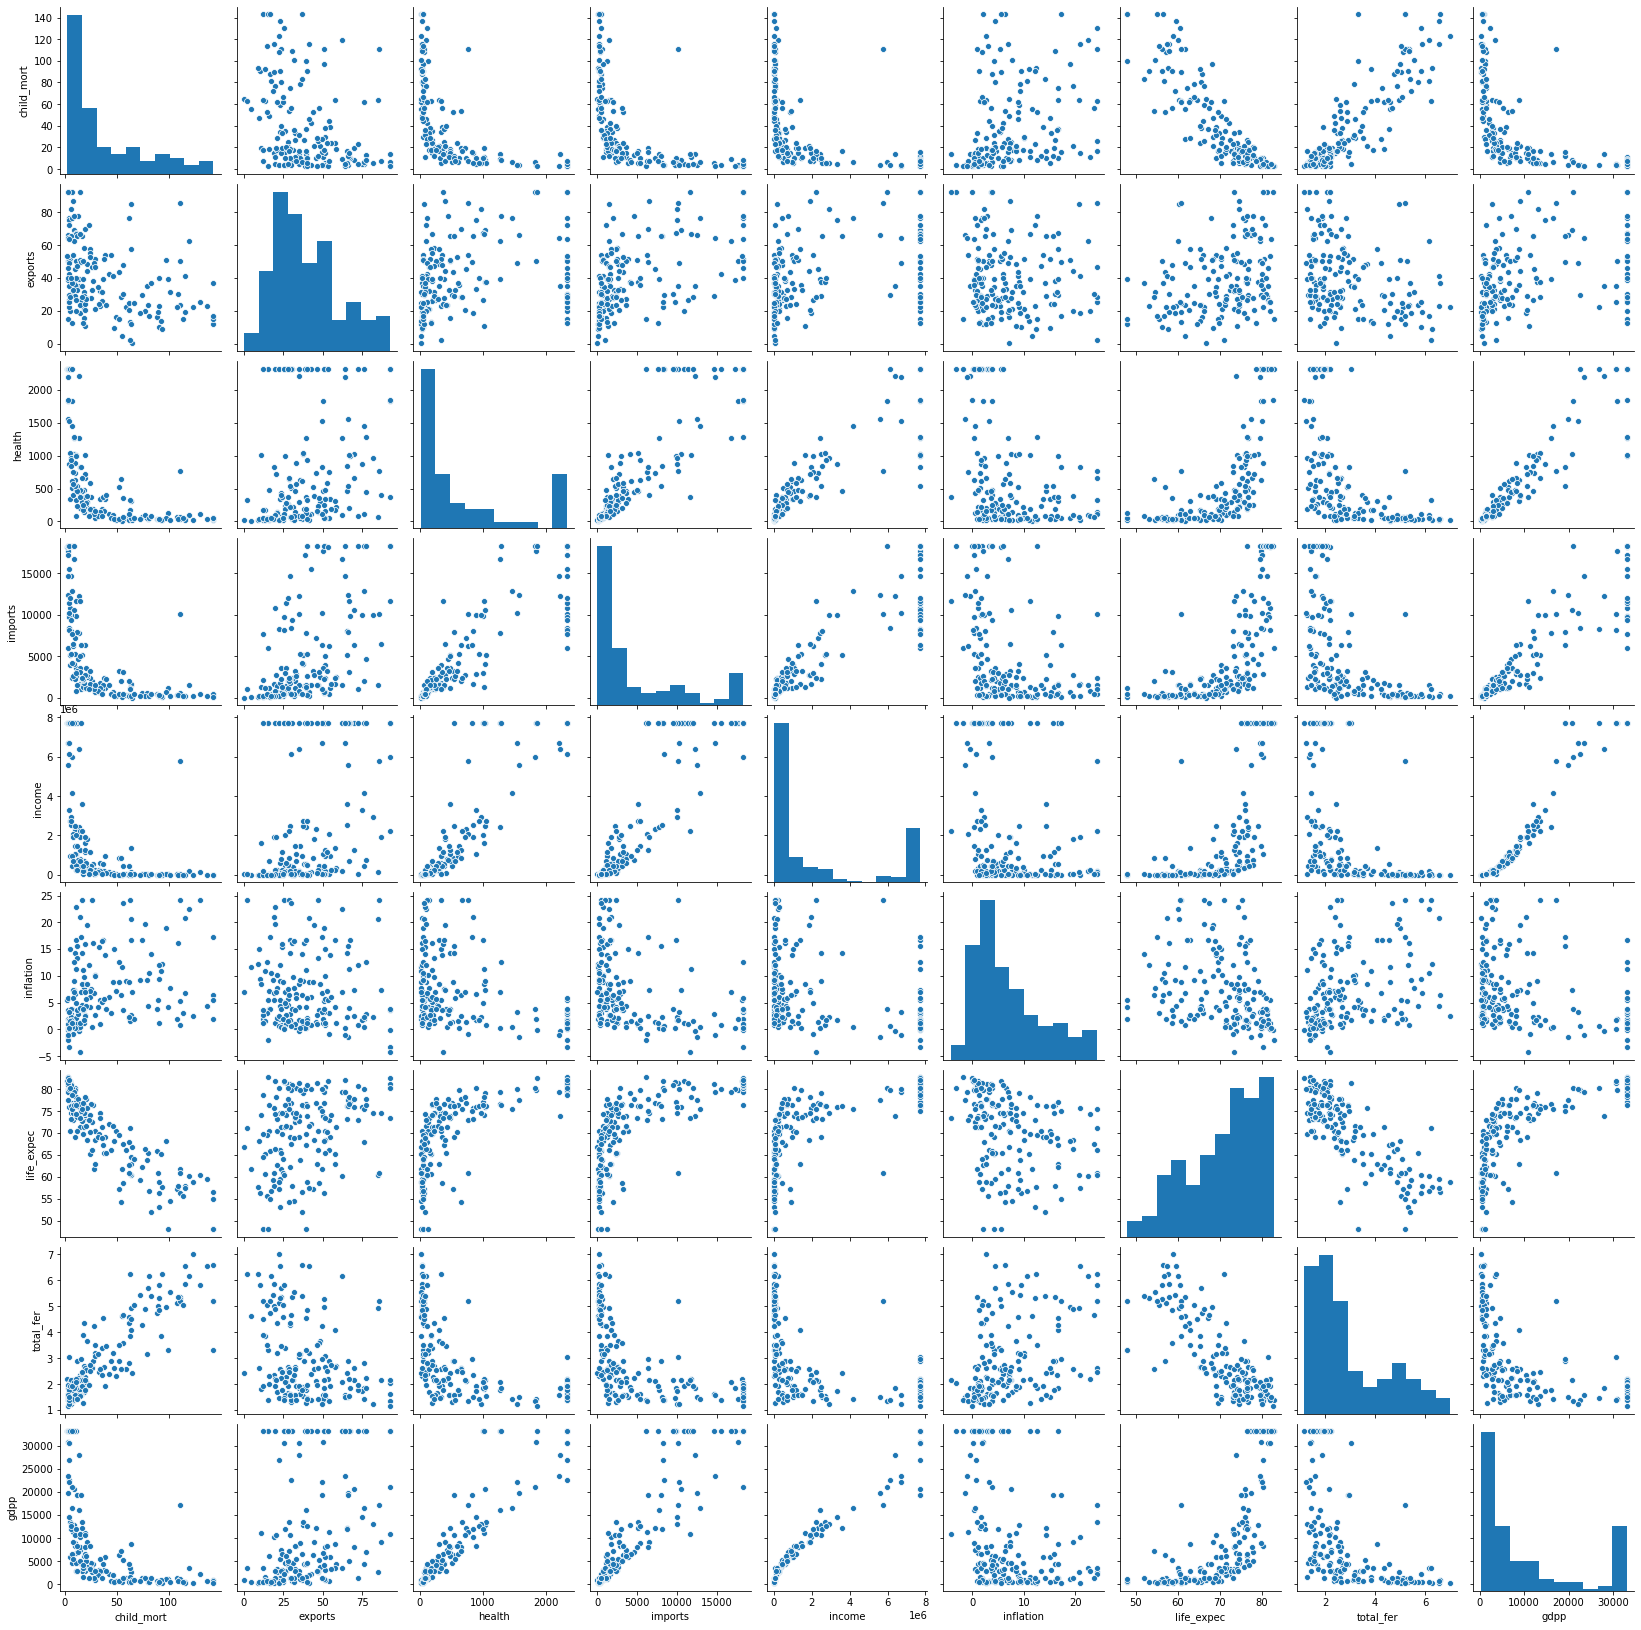

In [19]:
# Visualising the data using pairplot after treatment of outliers

# Setting the figure Size
plt.figure(figsize=(20,15))

#plotting the pairplot using seaborn
sns.pairplot(DF, x_vars = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 
                      y_vars = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])
#showing the plot
plt.show()

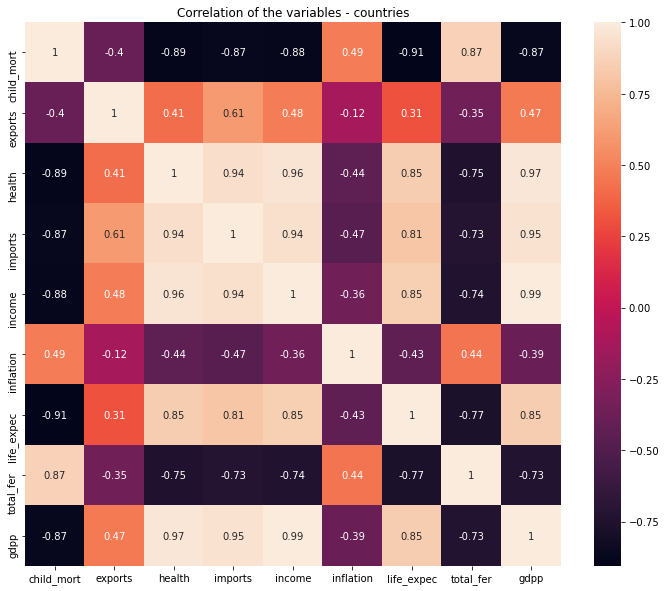

In [20]:
# Plotting heat map to see the correlation of the dataset after outiler treatment

# setting figure size and inline

%matplotlib inline 
plt.figure(figsize=(12,10))

# setting title

plt.title("Correlation of the variables - countries")

# Heatmap plotting

sns.heatmap(DF.corr(method='spearman'),annot=True)   # Method is used 'spearman' for monotonic

plt.show()   # Now showing

Inference: From the above heatmap, we can see that there are some variables having very high correlation with repect to postive and negative.

# 3. Clustering

## Hopkins Test

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

1.If the value is between {0.01, ...,0.3}, the data is regularly spaced.

2.If the value is around 0.5, it is random.

3.If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [21]:
# Importing necessary libraries for Hopkins Test 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(DF.drop('country', axis = 1))

0.9837291077887669

Inference: Given data is good for performing clustering.

## Scaling Data 

In [23]:
# Remove the non-numerical column i.e. 'Country'
DF1 =DF.drop('country',axis=1)

In [24]:
# Scaling the dataset with Standard Scaler
standard_scaler = StandardScaler()
DF1 = standard_scaler.fit_transform(DF1)

# 3.1 KMeans Clustering 

## 3.1.1 Elbow Curve 

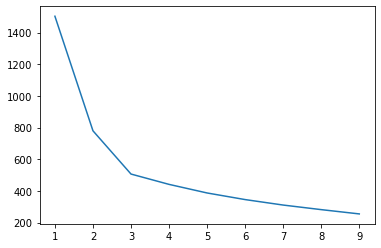

In [25]:
# Finding Optimal number of clusters.
# Elbow Curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(DF1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

## 3.1.2 Silhouette Analysis 

silhouette score= 𝑝−𝑞/𝑚𝑎𝑥(𝑝,𝑞)

𝑝  is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞 is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

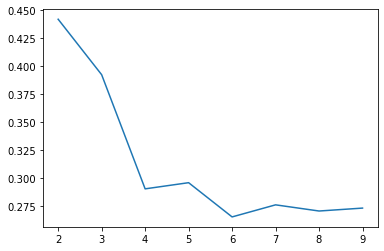

In [26]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(DF1)
    ss.append([k, silhouette_score(DF1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [27]:
# selecting range of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# For loop
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50) # Using iteration 50 for finding Kmeans
    kmeans.fit(DF1)                                       # fitting the kmeans
    
    cluster_labels = kmeans.labels_                      # saving the labels in a cluster_label list
    
    # silhouette score
    silhouette_avg = silhouette_score(DF1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.44211573353808403
For n_clusters=3, the silhouette score is 0.3924268995375775
For n_clusters=4, the silhouette score is 0.29392350729017036
For n_clusters=5, the silhouette score is 0.3025417343276182
For n_clusters=6, the silhouette score is 0.2705639251031337
For n_clusters=7, the silhouette score is 0.27251738882277876
For n_clusters=8, the silhouette score is 0.25487515883566936


### Optimal Number of K =3 

### Initialising kmeans 

In [28]:
# # k=3 and iteration=100
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)

# fitting the dataset
kmeans.fit(DF1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [29]:
#  New dataset cluster labels
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [30]:
#keeping our original data safe
DF_org = DF.copy()

In [31]:
# Assign Kmeans_labels
DF_km = pd.concat([DF, pd.Series(kmeans.labels_)], axis = 1)
DF_km.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
DF_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200.0,0


In [32]:
# check the value counts for cluster_id
DF_km['cluster_id'].value_counts()

0    80
2    50
1    37
Name: cluster_id, dtype: int64

## 3.1.3 KMeans cluster visualization 

#### exports vs gdpp 

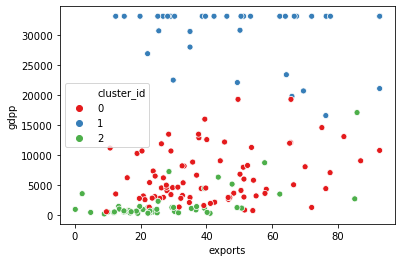

In [33]:
# Plotting Scatter plot export vs gdpp
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster_id', legend = 'full', data = DF_km, palette='Set1')

# Showing the plot
plt.show()

Inference : No inference we get from this Scatter plot.

####  health vs gdpp

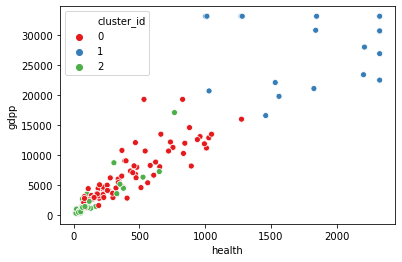

In [34]:
# Plotting Scatter plot health vs gdpp
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_id', legend = 'full', data = DF_km, palette='Set1')

# Showing the plot
plt.show()

Inference : The Scatter plot between the Health and gdpp at some point linear correlations for cluster_id 2 and cluster_id 0.


#### child_mort vs health

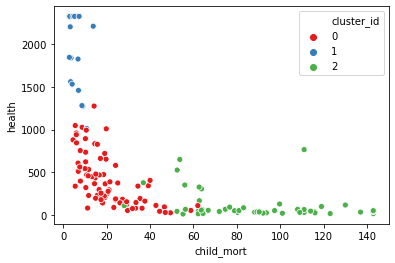

In [35]:
# Plotting Scatter plot child_mort vs health
sns.scatterplot(x = 'child_mort', y = 'health', hue ='cluster_id', legend = 'full', data = DF_km, palette='Set1')

# Showing the plot
plt.show()

Inference : For Cluster_id 2 ,health expenditure is very low and child mortality is very high.

   For Cluster_id 1, health expenditure is  high and child mortality is very low.

#### income vs gdpp

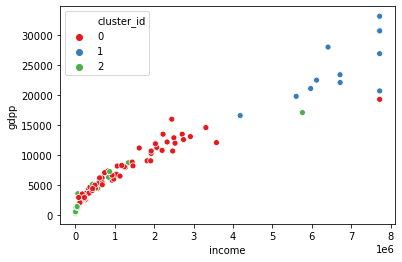

In [36]:
# Plotting Scatter plot income vs gdpp
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = DF_km, palette='Set1')

# Showing the plot
plt.show()

Inference : The scatter plot between the income and gdpp show  some linear correlation between them for cluster_id 0 and cluster_id 2.


#### total_fer vs child_mort

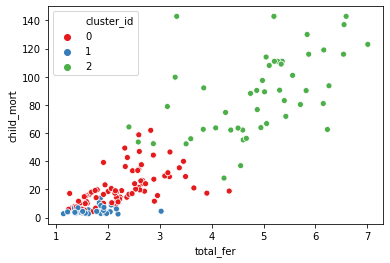

In [37]:
# Plotting Scatter total_fer vs child_mort
sns.scatterplot(x = 'total_fer', y = 'child_mort', hue ='cluster_id', legend = 'full', data = DF_km, palette='Set1')

# Showing the plot
plt.show()

Inference : No inference.

#### life_expec vs child_mort

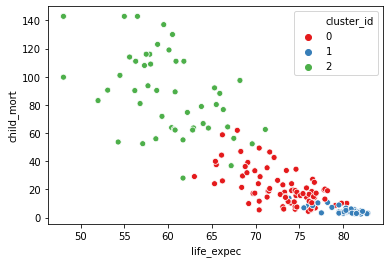

In [38]:
# Plotting Scatter plot life_expec vs child_mort
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_id', legend = 'full', data = DF_km, palette='Set1')

# Showing the plot
plt.show()

Inference : For Cluster_id 2 , life expectancy is very low and child mortality is very high.

For Cluster_id 1, life expectancy is  high and child mortality is  low.


## 3.1.4 Kmeans Cluster Profiling 

#### cluster_id vs gdpp

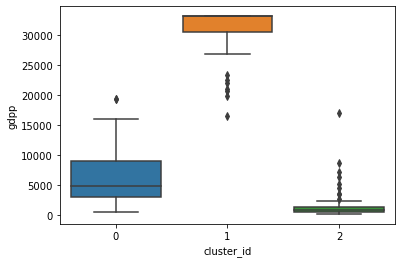

In [39]:
# Plotting the Boxplot cluster_id vs gdpp
sns.boxplot(data=DF_km,x = 'cluster_id',y='gdpp')

# Showing the plot
plt.show()

Inference: For cluster id  2  gdpp is very low in compare to other cluster id.


#### cluster_id vs child_mort

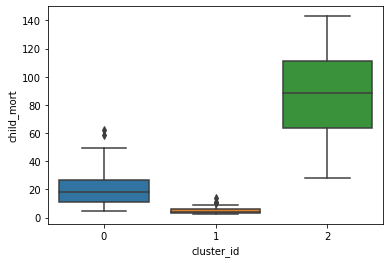

In [40]:
# Plotting the Boxplot cluster_id vs child_mort
sns.boxplot(data=DF_km,x = 'cluster_id',y='child_mort')

# Showing the plot
plt.show()

Inference : For cluster id 2  child mortality is very high in compare to other cluster id.


#### cluster_id vs income 

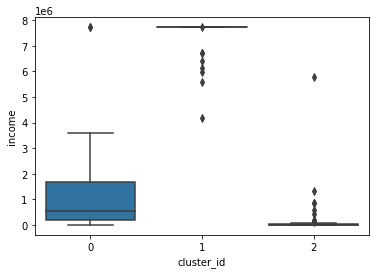

In [41]:
# Plotting the Boxplot cluster_id vs income
sns.boxplot(data=DF_km,x = 'cluster_id',y='income')

# Showing the plot
plt.show()

Inference: Cluster id 2 has very low income in compare to other cluster_id.

In [42]:
#Finding the observations countries that belong to cluster id 2
DF_km[DF_km['cluster_id']==2]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [43]:
# Finding the top 10 countries
Top_kmeans = DF_km[DF_km['cluster_id']==2].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
Top_kmeans = Top_kmeans.reset_index().drop('index',axis=1)

# Printing the Top 10 countries
Top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Sierra Leone,142.875,16.8,52.2690,137.655,4867.80,17.20,55.00,5.2000,399.0,2
1,Central African Republic,142.875,11.8,17.7508,118.190,3960.48,2.01,48.05,5.2100,446.0,2
2,Haiti,142.875,15.3,45.7442,428.314,9930.00,5.45,48.05,3.3300,662.0,2
3,Chad,142.875,36.8,40.6341,390.195,17312.10,6.39,56.50,6.5900,897.0,2
4,Mali,137.000,22.8,35.2584,248.508,13239.60,4.37,59.50,6.5500,708.0,2
5,Nigeria,130.000,25.3,118.1310,405.420,119995.00,24.16,60.50,5.8400,2330.0,2
6,Niger,123.000,22.2,17.9568,170.868,2832.72,2.55,58.80,7.0075,348.0,2
7,Angola,119.000,62.3,100.6050,1514.370,208270.00,22.40,60.10,6.1600,3530.0,2
8,"Congo, Dem. Rep.",116.000,41.1,26.4194,165.664,2034.06,20.80,57.50,6.5400,334.0,2
9,Burkina Faso,116.000,19.2,38.7550,170.200,8222.50,6.81,57.90,5.8700,575.0,2


In [44]:
Top_10 = Top_kmeans.iloc[:10]
Top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


#### Top 10 countries obtained from K-Means Models are: 

1.Sierra Leone

2.Central African Republic

3.Haiti

4.Chad

5.Mali

6.Nigeria

7.Niger

8.Angola

9.Congo, Dem. Rep.

10.Burkina Faso

# 3.2 Heirarichal Clustering 

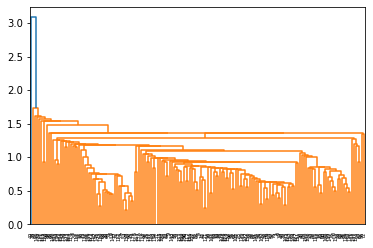

In [45]:
# Single Linkage
mergings_single = linkage(DF1, method="single", metric='euclidean')
dendrogram(mergings_single)

# Showing plot
plt.show()

Inference: Clusters are not forming correctly in single linkage so we will not use this modelling.

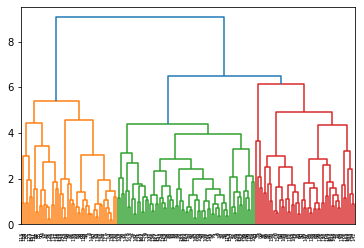

In [46]:
# Complete Linkage
mergings_complete = linkage(DF1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
# Showing plot
plt.show()

Inference: Single linkage is not interpretable so we will go with complete linkage model.

#### Looking at dendrogram of hierarchical clustering there seem to be 3 clusters.

In [47]:
# 3 Cluster
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0,
       0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [48]:
# Assign Cluster_labels
DF_hm = pd.concat([DF, pd.Series(cluster_labels)], axis = 1)
DF_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
DF_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200.0,2


In [49]:
# # check the value counts for cluster_labels
DF_hm['cluster_labels'].value_counts()

1    69
0    50
2    48
Name: cluster_labels, dtype: int64

## 3.2.1 Heirarichal Clusters Visulaisation

#### life_expec vs child_mort 

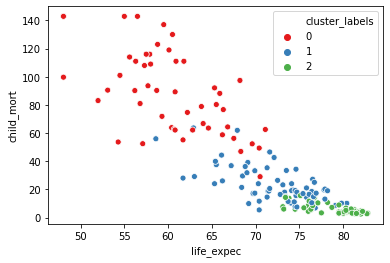

In [50]:
# Plotting the Scatter plot life_expec vs child_mort
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = DF_hm, palette='Set1')

# Showing the Plot
plt.show()

Inference : For Cluster_labels 0, life expectancy is very low and child mortality is very high.

For Cluster_labels 1, life expectancy is high and child mortality is low.

#### health vs gdpp 

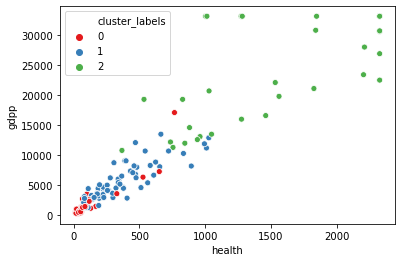

In [51]:
# Plotting the Scatter plot health vs gdpp
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = DF_hm, palette='Set1')

# Showing the Plot
plt.show()

Inference : The Scatter plot between the health and gdpp at some point linear correlations for cluster_labels 0 and cluster_labels 1.

#### income vs gdpp 

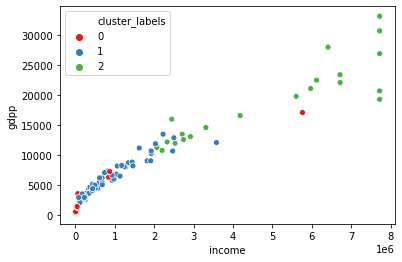

In [52]:
# Plotting the Scatter plot income vs gdpp
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = DF_hm, palette='Set1')

# Showing the Plot
plt.show()

Inference : The scatter plot between the income and gdpp show some linear correlation between them for cluster_labels 0 and cluster_labels 1.

#### health vs life_expec 

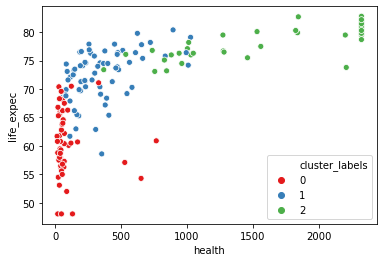

In [53]:
# Plotting the Scatter plot health vs life_expec
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = DF_hm, palette='Set1')

# Showing the Plot
plt.show()

Inference : The scatter plot between the health and life_expec show that cluster_labels 0 and cluster_labels 1 is high life expenditure and low total health spent per capita.

## 3.2.2 Heirarichal Clustering Profiling 

#### cluster_labels vs income 

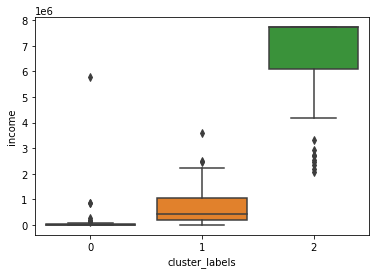

In [54]:
# Plotting the box plot cluster_labels vs income
sns.boxplot(data=DF_hm,x = 'cluster_labels',y='income')

# Showing the plot
plt.show()

Inference : For Cluster_labels 0 income is vey low in compare to the other cluster_labels.


#### cluster_labels vs gdpp 

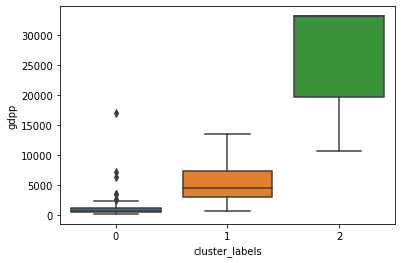

In [55]:
# Plotting the  box plot cluster_labels vs gdpp
sns.boxplot(data=DF_hm,x = 'cluster_labels',y='gdpp')

# Showing the Plot
plt.show()

Inference : For Cluster_labels 0 gdpp is vey low in compare to the other cluster_labels.

#### cluster_labels vs child_mort 

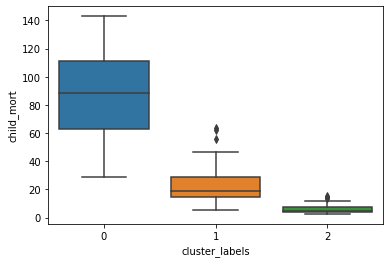

In [56]:
# Plotting the box plot cluster_labels vs child_mort
sns.boxplot(data=DF_hm,x = 'cluster_labels',y='child_mort')

# Showing the plot
plt.show()

Inference : For Cluster_labels 0 child_mort is vey high in compare to the other cluster_labels.

#### Finding the observations that belong to cluster 0 

In [57]:
# Finding the observations of countries that belong to cluster_labels 0
DF_hm[DF_hm['cluster_labels']==0]['country']

0                   Afghanistan
3                        Angola
12                   Bangladesh
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
47                        Egypt
49            Equatorial Guinea
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99      

In [58]:
# Finding the top 10 countries
Top_h = DF_hm[DF_hm['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
Top_h = Top_h.reset_index().drop('index',1)

# Print top 10 countries
Top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Sierra Leone,142.875,16.8,52.2690,137.655,4867.80,17.20,55.00,5.2000,399.0,0
1,Central African Republic,142.875,11.8,17.7508,118.190,3960.48,2.01,48.05,5.2100,446.0,0
2,Haiti,142.875,15.3,45.7442,428.314,9930.00,5.45,48.05,3.3300,662.0,0
3,Chad,142.875,36.8,40.6341,390.195,17312.10,6.39,56.50,6.5900,897.0,0
4,Mali,137.000,22.8,35.2584,248.508,13239.60,4.37,59.50,6.5500,708.0,0
5,Nigeria,130.000,25.3,118.1310,405.420,119995.00,24.16,60.50,5.8400,2330.0,0
6,Niger,123.000,22.2,17.9568,170.868,2832.72,2.55,58.80,7.0075,348.0,0
7,Angola,119.000,62.3,100.6050,1514.370,208270.00,22.40,60.10,6.1600,3530.0,0
8,"Congo, Dem. Rep.",116.000,41.1,26.4194,165.664,2034.06,20.80,57.50,6.5400,334.0,0
9,Burkina Faso,116.000,19.2,38.7550,170.200,8222.50,6.81,57.90,5.8700,575.0,0


In [59]:
Top_10 = Top_h.iloc[:10]
Top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


#### Top 10 Countries obtained from Hierarchical Models are; 

1.Sierra Leone

2.Central African Republic

3.Haiti

4.Chad

5.Mali

6.Nigeria

7.Niger

8.Angola

9.Congo, Dem. Rep.

10.Burkina Faso

# Summary

We got the same top ten countries from both Hierarchical and K-means model that are in dire need of Aid. Top 10 Countries  that obtained from both Hierarchical and K-means model are as follows:

1.Sierra Leone

2.Central African Republic

3.Haiti

4.Chad

5.Mali

6.Nigeria

7.Niger

8.Angola

9.Congo, Dem. Rep.

10.Burkina Faso